In [39]:
import os
import gensim#from gensim.models import word2vec
import math
import random
import numpy as np
from numpy import linalg as la
import datetime
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


In [40]:

def extract_data_from_file_and_generate_train_and_test__with_fixed_train_len(filename, train_len, delimiter):
    train = None
    data = {}

    with open(filename , 'r') as f:
        for i, line in enumerate(f):
            userId, movieId, rating, timestamp = line.split(delimiter)
            #userId = int(userId)
            #movieId = int(movieId)
            rating = float(rating)
            timestamp = int(timestamp)

            if userId not in data:
                data[userId] = []
            data[userId].append((movieId, rating, timestamp))

    train = {}
    for i, userId in enumerate(data):
        total_len = len(data[userId])
        if i == train_len:
            break
        train[userId] = data[userId]
    
    return train


In [41]:
def convert_level_1_dict_level_2_list_of_size_3_tuples_to_list_of_list(data):
    return [map(lambda y: y[0], data[x]) for x in data]

In [42]:
#data_filename, delimiter, data_set = os.path.sep.join(['ml-100k', 'u.data']), '\t', '100K'
#data_filename, delimiter, data_set = os.path.sep.join(['ml-1m', 'ratings.dat']), '::', '1M'
data_filename, delimiter, data_set = os.path.sep.join(['ml-10M100K', 'ratings.dat']), '::', '10M'


def get_lines(filename):
    cnt = 0
    with open(filename , 'r') as f:
        for cnt, line in enumerate(f):
            pass
    return cnt + 1

total_lines = get_lines(data_filename)
print 'total_lines:', total_lines

K = None
N = None


total_lines: 10000054


In [43]:

def train_a_model(para):
    data = para['data']
    num_features = para['num_features']
    min_count = para['min_count']
    window = para['window']
    para_iter = para['iter']
    batch_words = para['batch_words']

    #list_of_list = convert_2_level_dict_to_list_of_list(data)
    list_of_list = convert_level_1_dict_level_2_list_of_size_3_tuples_to_list_of_list(data)
    #print 'list_of_list:', list_of_list

    print 'start training'
    model = gensim.models.Word2Vec(list_of_list, size=num_features, min_count=min_count, window=window, sg=0, iter=para_iter, batch_words=batch_words)
    print 'training finished'

In [13]:
train_set_size_list

array([    100,    1000,   10000,  100000, 1000000])

In [14]:
train_set_size_list * 1. / total_lines

array([  9.99791044e-05,   9.99791044e-04,   9.99791044e-03,
         9.99791044e-02,   9.99791044e-01])

In [51]:
#train_set_size_list = 10 ** np.array(range(1, 4 + 1))
train_set_size_list = 10**4 * np.array(range(1, 5 + 1))
iter_list = [20, 30, 40]

metric = []

###

test_data_inner_ratio = 0.5  # insignificant in this notebook
s, mc, w = 100, 1, 1         # insignificant in this notebook
batch_words = 10000          # insignificant in this notebook

seed = 2 
random.seed(seed)

for __i, train_set_size in enumerate(train_set_size_list):
    
    train = extract_data_from_file_and_generate_train_and_test__with_fixed_train_len(data_filename, train_set_size, delimiter)
    print 'len(train):', len(train)
  
    for __j, para_iter in enumerate(iter_list):
        para = {'data': train, 
            'model_name': 'main_model',
            'num_features': s,
            'min_count': mc,
            'window': w,
            'iter': para_iter,
            'batch_words': batch_words,
        }
        ##
        starttime = datetime.datetime.now()

        train_a_model(para)

        endtime = datetime.datetime.now()
        interval = (endtime - starttime).seconds
        
        metric.append((train_set_size, para_iter, interval))
        
        #break
    #break
print metric

2017-02-24 13:56:23,835 : INFO : collecting all words and their counts
2017-02-24 13:56:23,835 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types


len(train): 10000
start training


2017-02-24 13:56:24,011 : INFO : collected 10126 word types from a corpus of 1420935 raw words and 10000 sentences
2017-02-24 13:56:24,013 : INFO : Loading a fresh vocabulary
2017-02-24 13:56:24,187 : INFO : min_count=1 retains 10126 unique words (100% of original 10126, drops 0)
2017-02-24 13:56:24,188 : INFO : min_count=1 leaves 1420935 word corpus (100% of original 1420935, drops 0)
2017-02-24 13:56:24,215 : INFO : deleting the raw counts dictionary of 10126 items
2017-02-24 13:56:24,218 : INFO : sample=0.001 downsamples 13 most-common words
2017-02-24 13:56:24,218 : INFO : downsampling leaves estimated 1415911 word corpus (99.6% of prior 1420935)
2017-02-24 13:56:24,219 : INFO : estimated required memory for 10126 words and 100 dimensions: 13163800 bytes
2017-02-24 13:56:24,245 : INFO : resetting layer weights
2017-02-24 13:56:24,340 : INFO : training model with 3 workers on 10126 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=1
2017-02-24 13:56:24,340 

training finished
start training


2017-02-24 13:56:41,730 : INFO : collected 10126 word types from a corpus of 1420935 raw words and 10000 sentences
2017-02-24 13:56:41,731 : INFO : Loading a fresh vocabulary
2017-02-24 13:56:41,758 : INFO : min_count=1 retains 10126 unique words (100% of original 10126, drops 0)
2017-02-24 13:56:41,759 : INFO : min_count=1 leaves 1420935 word corpus (100% of original 1420935, drops 0)
2017-02-24 13:56:41,784 : INFO : deleting the raw counts dictionary of 10126 items
2017-02-24 13:56:41,785 : INFO : sample=0.001 downsamples 13 most-common words
2017-02-24 13:56:41,786 : INFO : downsampling leaves estimated 1415911 word corpus (99.6% of prior 1420935)
2017-02-24 13:56:41,786 : INFO : estimated required memory for 10126 words and 100 dimensions: 13163800 bytes
2017-02-24 13:56:41,810 : INFO : resetting layer weights
2017-02-24 13:56:41,907 : INFO : training model with 3 workers on 10126 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=1
2017-02-24 13:56:41,907 

training finished
start training


2017-02-24 13:57:07,544 : INFO : training model with 3 workers on 10126 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=1
2017-02-24 13:57:07,545 : INFO : expecting 10000 sentences, matching count from corpus used for vocabulary survey
2017-02-24 13:57:08,552 : INFO : PROGRESS: at 2.55% examples, 1440247 words/s, in_qsize 5, out_qsize 0
2017-02-24 13:57:09,555 : INFO : PROGRESS: at 5.34% examples, 1516448 words/s, in_qsize 5, out_qsize 0
2017-02-24 13:57:10,555 : INFO : PROGRESS: at 8.26% examples, 1563262 words/s, in_qsize 5, out_qsize 0
2017-02-24 13:57:11,563 : INFO : PROGRESS: at 11.29% examples, 1593546 words/s, in_qsize 5, out_qsize 0
2017-02-24 13:57:12,564 : INFO : PROGRESS: at 14.28% examples, 1613960 words/s, in_qsize 6, out_qsize 0
2017-02-24 13:57:13,565 : INFO : PROGRESS: at 17.32% examples, 1631186 words/s, in_qsize 5, out_qsize 0
2017-02-24 13:57:14,565 : INFO : PROGRESS: at 20.33% examples, 1642894 words/s, in_qsize 5, out_qsize 0
2017-02-24 

training finished
len(train): 20000


2017-02-24 13:57:50,890 : INFO : collecting all words and their counts
2017-02-24 13:57:50,891 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-02-24 13:57:51,030 : INFO : PROGRESS: at sentence #10000, processed 1419827 words, keeping 10049 word types


start training


2017-02-24 13:57:51,180 : INFO : collected 10362 word types from a corpus of 2841323 raw words and 20000 sentences
2017-02-24 13:57:51,181 : INFO : Loading a fresh vocabulary
2017-02-24 13:57:51,209 : INFO : min_count=1 retains 10362 unique words (100% of original 10362, drops 0)
2017-02-24 13:57:51,210 : INFO : min_count=1 leaves 2841323 word corpus (100% of original 2841323, drops 0)
2017-02-24 13:57:51,237 : INFO : deleting the raw counts dictionary of 10362 items
2017-02-24 13:57:51,238 : INFO : sample=0.001 downsamples 12 most-common words
2017-02-24 13:57:51,238 : INFO : downsampling leaves estimated 2831231 word corpus (99.6% of prior 2841323)
2017-02-24 13:57:51,239 : INFO : estimated required memory for 10362 words and 100 dimensions: 13470600 bytes
2017-02-24 13:57:51,262 : INFO : resetting layer weights
2017-02-24 13:57:51,357 : INFO : training model with 3 workers on 10362 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=1
2017-02-24 13:57:51,357 

training finished
start training


2017-02-24 13:58:25,175 : INFO : PROGRESS: at sentence #10000, processed 1419827 words, keeping 10049 word types
2017-02-24 13:58:25,318 : INFO : collected 10362 word types from a corpus of 2841323 raw words and 20000 sentences
2017-02-24 13:58:25,318 : INFO : Loading a fresh vocabulary
2017-02-24 13:58:25,343 : INFO : min_count=1 retains 10362 unique words (100% of original 10362, drops 0)
2017-02-24 13:58:25,344 : INFO : min_count=1 leaves 2841323 word corpus (100% of original 2841323, drops 0)
2017-02-24 13:58:25,372 : INFO : deleting the raw counts dictionary of 10362 items
2017-02-24 13:58:25,372 : INFO : sample=0.001 downsamples 12 most-common words
2017-02-24 13:58:25,373 : INFO : downsampling leaves estimated 2831231 word corpus (99.6% of prior 2841323)
2017-02-24 13:58:25,374 : INFO : estimated required memory for 10362 words and 100 dimensions: 13470600 bytes
2017-02-24 13:58:25,399 : INFO : resetting layer weights
2017-02-24 13:58:25,495 : INFO : training model with 3 worker

training finished
start training


2017-02-24 13:59:14,935 : INFO : PROGRESS: at sentence #10000, processed 1419827 words, keeping 10049 word types
2017-02-24 13:59:15,079 : INFO : collected 10362 word types from a corpus of 2841323 raw words and 20000 sentences
2017-02-24 13:59:15,080 : INFO : Loading a fresh vocabulary
2017-02-24 13:59:15,103 : INFO : min_count=1 retains 10362 unique words (100% of original 10362, drops 0)
2017-02-24 13:59:15,104 : INFO : min_count=1 leaves 2841323 word corpus (100% of original 2841323, drops 0)
2017-02-24 13:59:15,130 : INFO : deleting the raw counts dictionary of 10362 items
2017-02-24 13:59:15,131 : INFO : sample=0.001 downsamples 12 most-common words
2017-02-24 13:59:15,132 : INFO : downsampling leaves estimated 2831231 word corpus (99.6% of prior 2841323)
2017-02-24 13:59:15,132 : INFO : estimated required memory for 10362 words and 100 dimensions: 13470600 bytes
2017-02-24 13:59:15,154 : INFO : resetting layer weights
2017-02-24 13:59:15,251 : INFO : training model with 3 worker

training finished
len(train): 30000


2017-02-24 14:00:31,316 : INFO : collecting all words and their counts
2017-02-24 14:00:31,317 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-02-24 14:00:31,454 : INFO : PROGRESS: at sentence #10000, processed 1428282 words, keeping 10122 word types


start training


2017-02-24 14:00:31,641 : INFO : PROGRESS: at sentence #20000, processed 2859200 words, keeping 10345 word types
2017-02-24 14:00:31,789 : INFO : collected 10490 word types from a corpus of 4268759 raw words and 30000 sentences
2017-02-24 14:00:31,789 : INFO : Loading a fresh vocabulary
2017-02-24 14:00:31,809 : INFO : min_count=1 retains 10490 unique words (100% of original 10490, drops 0)
2017-02-24 14:00:31,810 : INFO : min_count=1 leaves 4268759 word corpus (100% of original 4268759, drops 0)
2017-02-24 14:00:31,836 : INFO : deleting the raw counts dictionary of 10490 items
2017-02-24 14:00:31,838 : INFO : sample=0.001 downsamples 12 most-common words
2017-02-24 14:00:31,838 : INFO : downsampling leaves estimated 4253683 word corpus (99.6% of prior 4268759)
2017-02-24 14:00:31,839 : INFO : estimated required memory for 10490 words and 100 dimensions: 13637000 bytes
2017-02-24 14:00:31,865 : INFO : resetting layer weights
2017-02-24 14:00:31,965 : INFO : training model with 3 worker

training finished


2017-02-24 14:01:22,074 : INFO : collecting all words and their counts
2017-02-24 14:01:22,075 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-02-24 14:01:22,232 : INFO : PROGRESS: at sentence #10000, processed 1428282 words, keeping 10122 word types


start training


2017-02-24 14:01:22,398 : INFO : PROGRESS: at sentence #20000, processed 2859200 words, keeping 10345 word types
2017-02-24 14:01:22,537 : INFO : collected 10490 word types from a corpus of 4268759 raw words and 30000 sentences
2017-02-24 14:01:22,538 : INFO : Loading a fresh vocabulary
2017-02-24 14:01:22,559 : INFO : min_count=1 retains 10490 unique words (100% of original 10490, drops 0)
2017-02-24 14:01:22,559 : INFO : min_count=1 leaves 4268759 word corpus (100% of original 4268759, drops 0)
2017-02-24 14:01:22,585 : INFO : deleting the raw counts dictionary of 10490 items
2017-02-24 14:01:22,586 : INFO : sample=0.001 downsamples 12 most-common words
2017-02-24 14:01:22,587 : INFO : downsampling leaves estimated 4253683 word corpus (99.6% of prior 4268759)
2017-02-24 14:01:22,587 : INFO : estimated required memory for 10490 words and 100 dimensions: 13637000 bytes
2017-02-24 14:01:22,612 : INFO : resetting layer weights
2017-02-24 14:01:22,708 : INFO : training model with 3 worker

training finished


2017-02-24 14:02:36,944 : INFO : collecting all words and their counts
2017-02-24 14:02:36,944 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-02-24 14:02:37,084 : INFO : PROGRESS: at sentence #10000, processed 1428282 words, keeping 10122 word types


start training


2017-02-24 14:02:37,232 : INFO : PROGRESS: at sentence #20000, processed 2859200 words, keeping 10345 word types
2017-02-24 14:02:37,371 : INFO : collected 10490 word types from a corpus of 4268759 raw words and 30000 sentences
2017-02-24 14:02:37,372 : INFO : Loading a fresh vocabulary
2017-02-24 14:02:37,574 : INFO : min_count=1 retains 10490 unique words (100% of original 10490, drops 0)
2017-02-24 14:02:37,575 : INFO : min_count=1 leaves 4268759 word corpus (100% of original 4268759, drops 0)
2017-02-24 14:02:37,602 : INFO : deleting the raw counts dictionary of 10490 items
2017-02-24 14:02:37,604 : INFO : sample=0.001 downsamples 12 most-common words
2017-02-24 14:02:37,605 : INFO : downsampling leaves estimated 4253683 word corpus (99.6% of prior 4268759)
2017-02-24 14:02:37,605 : INFO : estimated required memory for 10490 words and 100 dimensions: 13637000 bytes
2017-02-24 14:02:37,633 : INFO : resetting layer weights
2017-02-24 14:02:37,731 : INFO : training model with 3 worker

training finished
len(train): 40000


2017-02-24 14:04:26,481 : INFO : collecting all words and their counts
2017-02-24 14:04:26,482 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-02-24 14:04:26,630 : INFO : PROGRESS: at sentence #10000, processed 1431766 words, keeping 10120 word types


start training


2017-02-24 14:04:26,803 : INFO : PROGRESS: at sentence #20000, processed 2864522 words, keeping 10356 word types
2017-02-24 14:04:26,958 : INFO : PROGRESS: at sentence #30000, processed 4299285 words, keeping 10490 word types
2017-02-24 14:04:27,103 : INFO : collected 10597 word types from a corpus of 5719941 raw words and 40000 sentences
2017-02-24 14:04:27,103 : INFO : Loading a fresh vocabulary
2017-02-24 14:04:27,124 : INFO : min_count=1 retains 10597 unique words (100% of original 10597, drops 0)
2017-02-24 14:04:27,125 : INFO : min_count=1 leaves 5719941 word corpus (100% of original 5719941, drops 0)
2017-02-24 14:04:27,151 : INFO : deleting the raw counts dictionary of 10597 items
2017-02-24 14:04:27,152 : INFO : sample=0.001 downsamples 12 most-common words
2017-02-24 14:04:27,153 : INFO : downsampling leaves estimated 5700357 word corpus (99.7% of prior 5719941)
2017-02-24 14:04:27,153 : INFO : estimated required memory for 10597 words and 100 dimensions: 13776100 bytes
2017-

training finished


2017-02-24 14:05:34,264 : INFO : collecting all words and their counts
2017-02-24 14:05:34,265 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-02-24 14:05:34,406 : INFO : PROGRESS: at sentence #10000, processed 1431766 words, keeping 10120 word types


start training


2017-02-24 14:05:34,575 : INFO : PROGRESS: at sentence #20000, processed 2864522 words, keeping 10356 word types
2017-02-24 14:05:34,723 : INFO : PROGRESS: at sentence #30000, processed 4299285 words, keeping 10490 word types
2017-02-24 14:05:34,880 : INFO : collected 10597 word types from a corpus of 5719941 raw words and 40000 sentences
2017-02-24 14:05:34,881 : INFO : Loading a fresh vocabulary
2017-02-24 14:05:35,132 : INFO : min_count=1 retains 10597 unique words (100% of original 10597, drops 0)
2017-02-24 14:05:35,132 : INFO : min_count=1 leaves 5719941 word corpus (100% of original 5719941, drops 0)
2017-02-24 14:05:35,159 : INFO : deleting the raw counts dictionary of 10597 items
2017-02-24 14:05:35,160 : INFO : sample=0.001 downsamples 12 most-common words
2017-02-24 14:05:35,161 : INFO : downsampling leaves estimated 5700357 word corpus (99.7% of prior 5719941)
2017-02-24 14:05:35,161 : INFO : estimated required memory for 10597 words and 100 dimensions: 13776100 bytes
2017-

training finished


2017-02-24 14:07:15,372 : INFO : collecting all words and their counts
2017-02-24 14:07:15,372 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-02-24 14:07:15,506 : INFO : PROGRESS: at sentence #10000, processed 1431766 words, keeping 10120 word types


start training


2017-02-24 14:07:15,668 : INFO : PROGRESS: at sentence #20000, processed 2864522 words, keeping 10356 word types
2017-02-24 14:07:15,815 : INFO : PROGRESS: at sentence #30000, processed 4299285 words, keeping 10490 word types
2017-02-24 14:07:15,947 : INFO : collected 10597 word types from a corpus of 5719941 raw words and 40000 sentences
2017-02-24 14:07:15,948 : INFO : Loading a fresh vocabulary
2017-02-24 14:07:15,973 : INFO : min_count=1 retains 10597 unique words (100% of original 10597, drops 0)
2017-02-24 14:07:15,973 : INFO : min_count=1 leaves 5719941 word corpus (100% of original 5719941, drops 0)
2017-02-24 14:07:16,001 : INFO : deleting the raw counts dictionary of 10597 items
2017-02-24 14:07:16,002 : INFO : sample=0.001 downsamples 12 most-common words
2017-02-24 14:07:16,002 : INFO : downsampling leaves estimated 5700357 word corpus (99.7% of prior 5719941)
2017-02-24 14:07:16,003 : INFO : estimated required memory for 10597 words and 100 dimensions: 13776100 bytes
2017-

training finished
len(train): 

2017-02-24 14:09:40,153 : INFO : collecting all words and their counts
2017-02-24 14:09:40,154 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-02-24 14:09:40,311 : INFO : PROGRESS: at sentence #10000, processed 1431385 words, keeping 10149 word types


50000
start training


2017-02-24 14:09:40,499 : INFO : PROGRESS: at sentence #20000, processed 2857514 words, keeping 10363 word types
2017-02-24 14:09:40,641 : INFO : PROGRESS: at sentence #30000, processed 4289001 words, keeping 10501 word types
2017-02-24 14:09:40,813 : INFO : PROGRESS: at sentence #40000, processed 5725339 words, keeping 10564 word types
2017-02-24 14:09:40,958 : INFO : collected 10634 word types from a corpus of 7139233 raw words and 50000 sentences
2017-02-24 14:09:40,958 : INFO : Loading a fresh vocabulary
2017-02-24 14:09:40,987 : INFO : min_count=1 retains 10634 unique words (100% of original 10634, drops 0)
2017-02-24 14:09:40,988 : INFO : min_count=1 leaves 7139233 word corpus (100% of original 7139233, drops 0)
2017-02-24 14:09:41,016 : INFO : deleting the raw counts dictionary of 10634 items
2017-02-24 14:09:41,017 : INFO : sample=0.001 downsamples 12 most-common words
2017-02-24 14:09:41,018 : INFO : downsampling leaves estimated 7114429 word corpus (99.7% of prior 7139233)
20

training finished


2017-02-24 14:11:05,029 : INFO : collecting all words and their counts
2017-02-24 14:11:05,029 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-02-24 14:11:05,158 : INFO : PROGRESS: at sentence #10000, processed 1431385 words, keeping 10149 word types


start training


2017-02-24 14:11:05,331 : INFO : PROGRESS: at sentence #20000, processed 2857514 words, keeping 10363 word types
2017-02-24 14:11:05,467 : INFO : PROGRESS: at sentence #30000, processed 4289001 words, keeping 10501 word types
2017-02-24 14:11:05,608 : INFO : PROGRESS: at sentence #40000, processed 5725339 words, keeping 10564 word types
2017-02-24 14:11:05,746 : INFO : collected 10634 word types from a corpus of 7139233 raw words and 50000 sentences
2017-02-24 14:11:05,746 : INFO : Loading a fresh vocabulary
2017-02-24 14:11:05,767 : INFO : min_count=1 retains 10634 unique words (100% of original 10634, drops 0)
2017-02-24 14:11:05,768 : INFO : min_count=1 leaves 7139233 word corpus (100% of original 7139233, drops 0)
2017-02-24 14:11:05,794 : INFO : deleting the raw counts dictionary of 10634 items
2017-02-24 14:11:05,795 : INFO : sample=0.001 downsamples 12 most-common words
2017-02-24 14:11:05,796 : INFO : downsampling leaves estimated 7114429 word corpus (99.7% of prior 7139233)
20

training finished


2017-02-24 14:13:09,897 : INFO : collecting all words and their counts
2017-02-24 14:13:09,898 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-02-24 14:13:10,032 : INFO : PROGRESS: at sentence #10000, processed 1431385 words, keeping 10149 word types


start training


2017-02-24 14:13:10,218 : INFO : PROGRESS: at sentence #20000, processed 2857514 words, keeping 10363 word types
2017-02-24 14:13:10,360 : INFO : PROGRESS: at sentence #30000, processed 4289001 words, keeping 10501 word types
2017-02-24 14:13:10,491 : INFO : PROGRESS: at sentence #40000, processed 5725339 words, keeping 10564 word types
2017-02-24 14:13:10,628 : INFO : collected 10634 word types from a corpus of 7139233 raw words and 50000 sentences
2017-02-24 14:13:10,629 : INFO : Loading a fresh vocabulary
2017-02-24 14:13:10,947 : INFO : min_count=1 retains 10634 unique words (100% of original 10634, drops 0)
2017-02-24 14:13:10,948 : INFO : min_count=1 leaves 7139233 word corpus (100% of original 7139233, drops 0)
2017-02-24 14:13:10,975 : INFO : deleting the raw counts dictionary of 10634 items
2017-02-24 14:13:10,977 : INFO : sample=0.001 downsamples 12 most-common words
2017-02-24 14:13:10,978 : INFO : downsampling leaves estimated 7114429 word corpus (99.7% of prior 7139233)
20

training finished
[(10000, 20, 17), (10000, 30, 25), (10000, 40, 32), (20000, 20, 33), (20000, 30, 49), (20000, 40, 65), (30000, 20, 50), (30000, 30, 75), (30000, 40, 98), (40000, 20, 68), (40000, 30, 101), (40000, 40, 133), (50000, 20, 84), (50000, 30, 125), (50000, 40, 166)]


In [45]:
[[z[-1] for z in y] for y in [filter(lambda x: x[0] == set_size, metric) for set_size in train_set_size_list]]

[[0, 0, 0], [0, 0, 0], [2, 2, 3], [18, 25, 34]]

In [46]:
[[z[-1] for z in y] for y in [filter(lambda x: x[1] == para_iter, metric) for para_iter in iter_list]]

[[0, 0, 2, 18], [0, 0, 2, 25], [0, 0, 3, 34]]

In [48]:
indexes

array([ 1.,  2.,  3.,  4.])

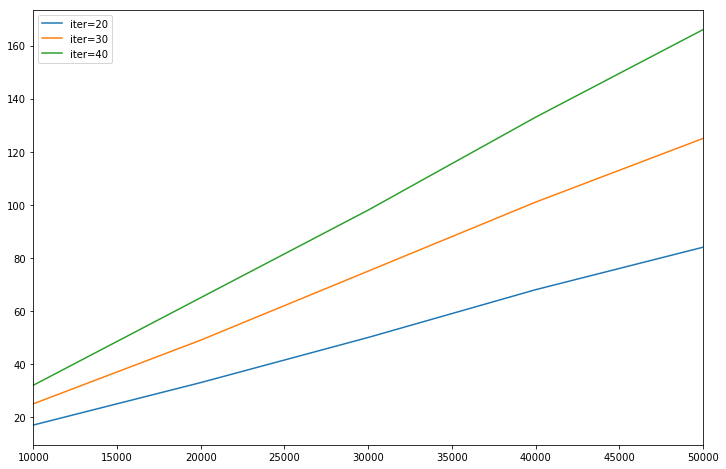

In [53]:
import pandas as pd
import matplotlib.pyplot as plt


#indexes = np.log10(train_set_size_list)
indexes = train_set_size_list
values = zip(* [[z[-1] for z in y] for y in [filter(lambda x: x[1] == para_iter, metric) for para_iter in iter_list]]  )

df = pd.DataFrame(values, index=indexes, columns=['iter=' + str(x) for x in iter_list])
df.plot()

fig = plt.gcf()
fig.set_size_inches(12, 8, forward=True)
plt.show()

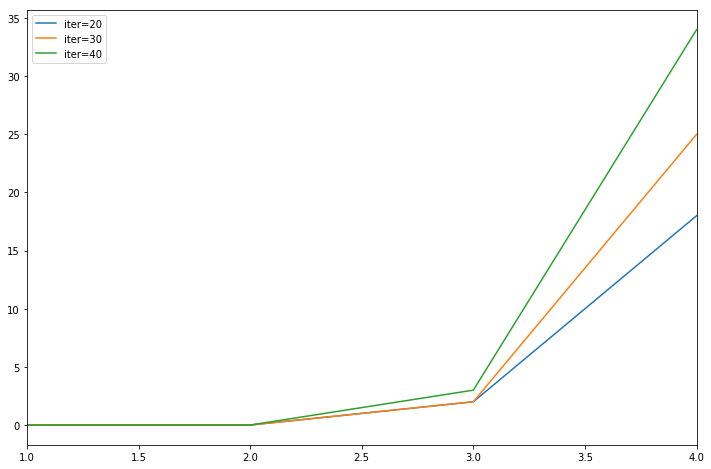

In [50]:
import pandas as pd
import matplotlib.pyplot as plt


indexes = np.log10(train_set_size_list)
values = zip(* [[z[-1] for z in y] for y in [filter(lambda x: x[1] == para_iter, metric) for para_iter in iter_list]]  )

df = pd.DataFrame(values, index=indexes, columns=['iter=' + str(x) for x in iter_list])
df.plot()

fig = plt.gcf()
fig.set_size_inches(12, 8, forward=True)
plt.show()